In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
# constants

G = 4*np.pi**2

mass = {
    'sun': 1.0,
    'earth': 3.0034e-6,
    'moon': 3.6923e-7}

r0 = {
    'sun': np.array([0,0,0]),
    'earth': np.array([9.978977040419635E-01, 6.586825681892025E-02, -6.320430920521123E-06]),
    'moon': np.array([9.956768547953816E-01, 6.676030485840675E-02, 1.641093070596718E-04])
     }
v0 = {
    'sun': np.array([0,0,0]),
    'earth': np.array([-4.70015711e-01, 6.25165839e+00, -3.40817831e-04]),
    'moon': np.array([-0.55065949, 6.03534661, 0.01111456])
}


In [4]:
# functions
def F_gravity(ri, rj, mi, mj):
    rij = ri - rj
    
    scalarrij = math.sqrt(np.dot(rij,rij))
    
    unitvector = rij/scalarrij
    
    return (-G*mi*mj*unitvector)/(scalarrij**2)

def F_ES(rE):
    return F_gravity(rE,r0["sun"],mass["earth"],mass["sun"])


def integrate_earth(tmax, dt=1e-3):
    i = 0
    r = r0["earth"]
    v = v0["earth"]
    r_values = [r0["earth"]]
    while i <= tmax:
        r = r + v*dt
        v += (F_ES(r)*dt)/mass["earth"]
        r_values.append(r.copy())
        i += dt
    return r_values


0.06586825681892025


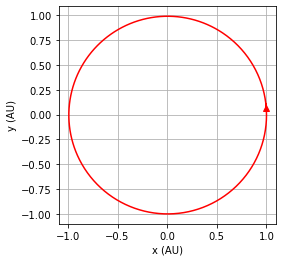

<Figure size 432x288 with 0 Axes>

In [5]:
plt.figure()
plt.gca().set_aspect("equal") 
plt.plot(r0["earth"][0],r0["earth"][1], "r^")

orbit = integrate_earth(1)
x = []
y = []
print(orbit[0][1])

for i in range(len(orbit)):
    x.append(orbit[i][0])
    y.append(orbit[i][1])
plt.plot(x,y,color = "red")
plt.xlabel("x (AU)")
plt.ylabel("y (AU)")
plt.grid()
plt.show()
plt.savefig('orbit_earth_only.png')